#  서울 따릉이 데이터 EDA
- https://dailyheumsi.tistory.com/91
- https://github.com/heumsi/Seoul-Public-bicycles-EDA

## 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 나의 루트 경로 설정
root_dir = '/content/drive/MyDrive/Colab Notebooks/데사노트/Project/'
sub_dir = '성심당/Reference/따릉이_EDA/Seoul-Public-bicycles-EDA-master/'

## Step1. 서울시내 따릉이 대여소 살펴보기

### 데이터 로드

In [ ]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

colab 한글 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and direc

위도/경도 좌표데이터?? 가져오기

In [ ]:
geo_path = root_dir + sub_dir + '/data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

서울시 자전거 대여소 정보 가져오기

In [ ]:
cols = ['대여소번호', '보관소(대여소)명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수(LCD)', '거치대수(QR)', '운영방식']
rental = pd.read_csv(root_dir + sub_dir + '/data_20240906/공공자전거_대여소정보.csv', encoding = 'utf-8', names = cols, index_col = False)
rental.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,거치대수(LCD),거치대수(QR),운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR


In [ ]:
rental.columns

Index(['대여소번호', '보관소(대여소)명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수(LCD)',
       '거치대수(QR)', '운영방식'],
      dtype='object')

In [ ]:
rental.shape

(2763, 10)

In [ ]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2763 non-null   int64  
 1   보관소(대여소)명  2763 non-null   object 
 2   자치구        2763 non-null   object 
 3   상세주소       2763 non-null   object 
 4   위도         2763 non-null   float64
 5   경도         2763 non-null   float64
 6   설치시기       2763 non-null   object 
 7   거치대수(LCD)  1444 non-null   float64
 8   거치대수(QR)   1662 non-null   float64
 9   운영방식       2763 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 216.0+ KB


<Axes: >

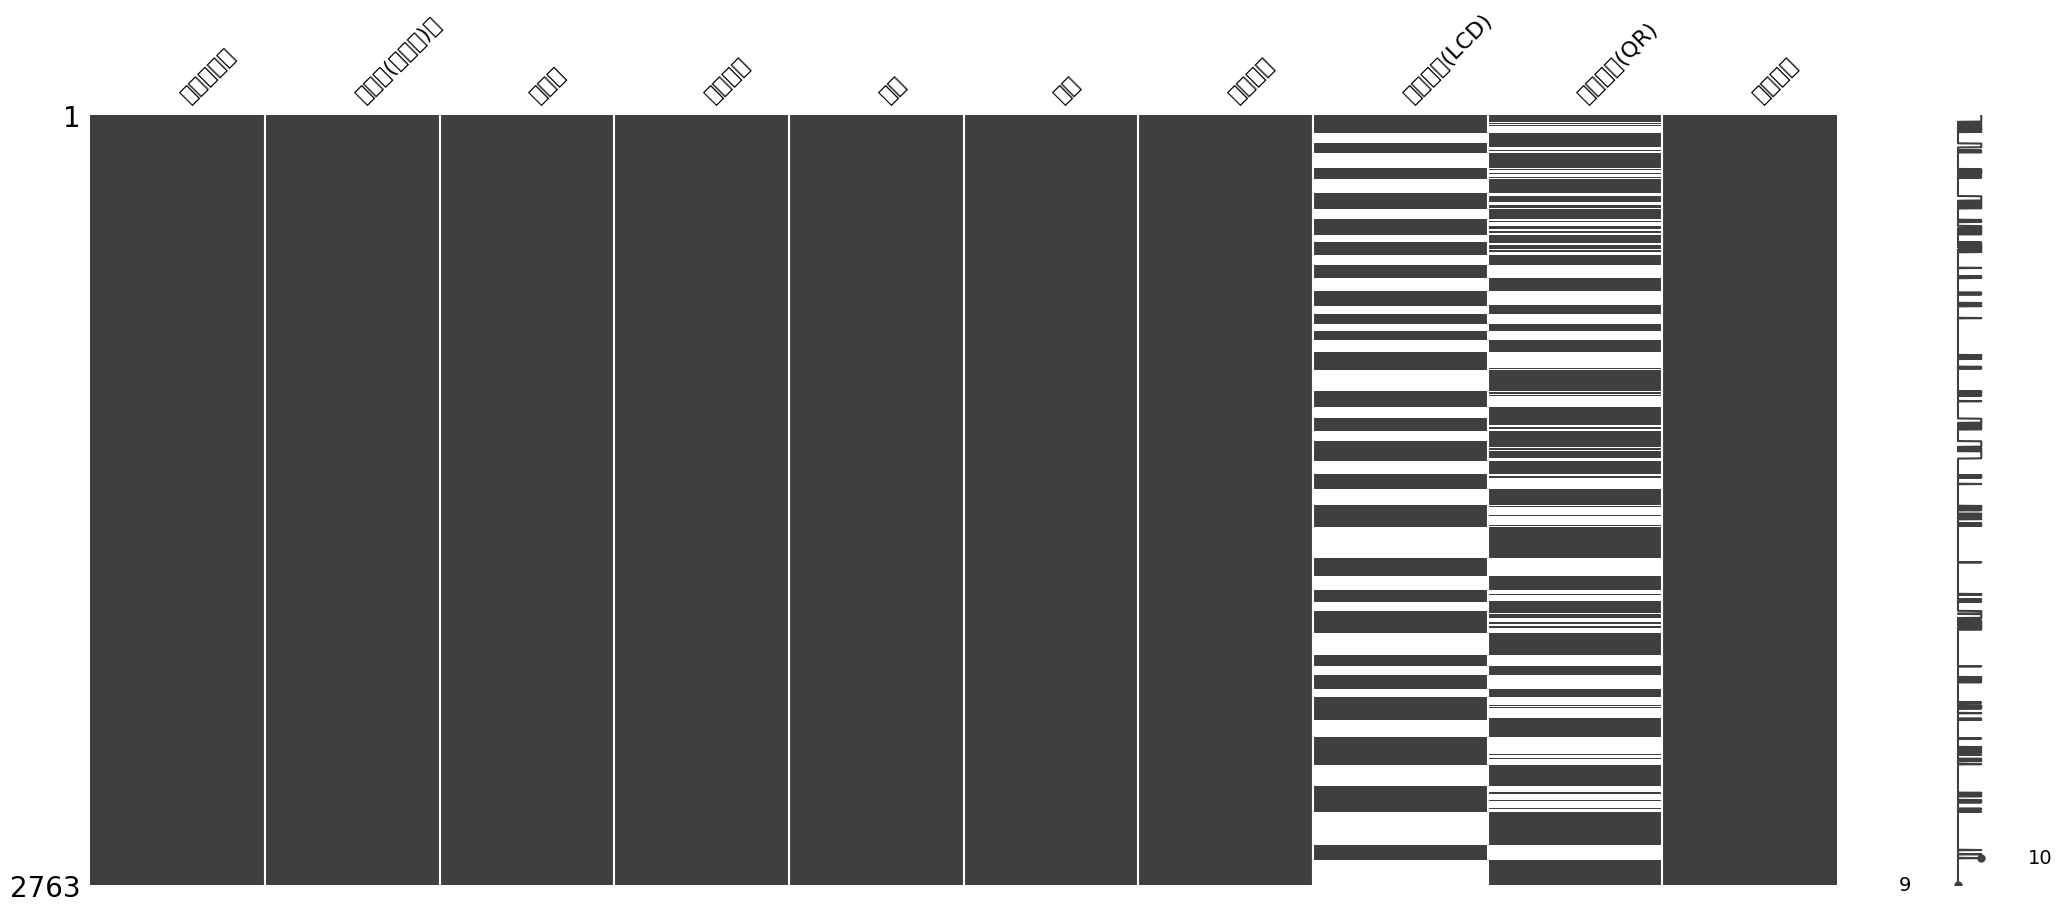

In [ ]:
import missingno as msno
msno.matrix(rental)

### 1.1. 따릉이 대여소 위치 무작정 시각화 해보기
- 곳곳에 설치된 따릉이 대여소들이 지도에 표시됩니다.

In [ ]:
bike_map = folium.Map(lcoation=[rental['위도'].mean(), rental['경도'].mean()], zoom_start=10.8, tiles = 'cartodbpositron')

for i, row in rental.iterrows():
  folium.CircleMarker(
      location = [row['위도'], row['경도']],
      radius = 1,
      fill = True,
  ).add_to(bike_map)

bike_map

- 히트맵으로 대여소들의 밀집도를 살펴봅니다.

In [ ]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 10.8, tiles =  'CartoDB positron')

plugins.HeatMap(rental[['위도', '경도']].values.tolist(),
                radius = 10, blur = 5
                ).add_to(bike_map)
plugins.Fullscreen(positions = 'topright').add_to(bike_map)
bike_map

역시 아무래도 서울 한 가운데 지점이 눈에 띄게 밀집도가 높은 것을 알수 있다.

## Step2. 지역구 중심으로 살펴보기

In [ ]:
rental['거치대수(LCD)'].fillna(0, inplace = True)
rental['거치대수(QR)'].fillna(0, inplace = True)

In [ ]:
rental['거치대수'] = rental['거치대수(LCD)'] + rental['거치대수(QR)']

In [ ]:
rental.head(3)

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,거치대수(LCD),거치대수(QR),운영방식,거치대수
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR,40.0
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR,24.0
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR,16.0


In [ ]:
have_bikes = rental.groupby('자치구').size()

In [ ]:
have_bikes.head()

,0
자치구,
강남구,178
강동구,117
강북구,60
강서구,191
관악구,76


### 2.1. 대여수 개수 살펴보기
- 지역별 대여수 개수, 색이 진할수록 해당 지역에 대여소 개수가 많다는 뜻입니다.
- 강남 3구(서초, 송파, 강남), 한강 서쪽 지역(마포, 강서, 영등포) 이 대여소가 많은 것을 한 눈에 알수 있습니다.

In [ ]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 11, tiles = 'cartodbpositron')

folium.Choropleth(geo_data=geo_str,
                  data=have_bikes,
                  key_on='feature.properties.SIG_KOR_NM',
                  fill_color='Blues').add_to(bike_map)
bike_map

In [ ]:
have_bikes.sort_values(ascending = False, inplace = True)
have_bikes.head()

,0
자치구,
송파구,217
강서구,191
강남구,178
영등포구,159
노원구,151


- 조금더 수치적으로 bar 차트로 확인해보겠습니다.
  - 가장 많은 곳(강남구, 95개)과 가장 적은 곳(도봉구, 31개)의 차이가 약 3배 가량 나는 것을 알 수 있다.

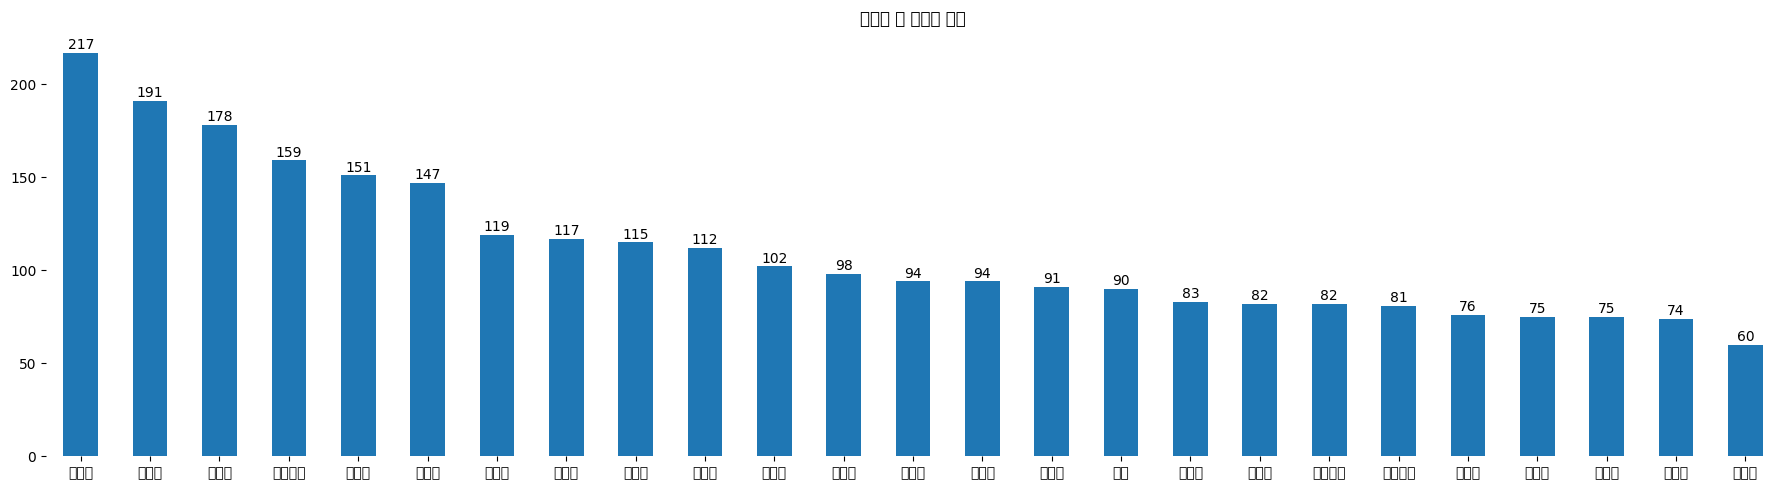

In [ ]:
ax = have_bikes.plot(kind = 'bar', figsize = (18, 5), rot = 0, title = '지역구 별 대여소 개수')
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

### 2.2. 지역별 대여소당 평균 거치대수 비교
- 하나의 따르잉 대여소에는 따릉이 거치해 놓을 수 있는 여러 개의 거치대가 있는데, 이 거치대 수에 대해서도 한번 살펴보자
- 먼저, 서울 시내 전체에서 거치대 수의 분포를 알아보겠습니다.
  - 일반적으로 10개, 조금 더 많은 곳은 15개, 20개가 대표적입니다.
  - 간혹 가다가, 30개, 40개인 곳도 보이는데, 이런 곳은 아무래도 대형 대여소 인듯 합니다.

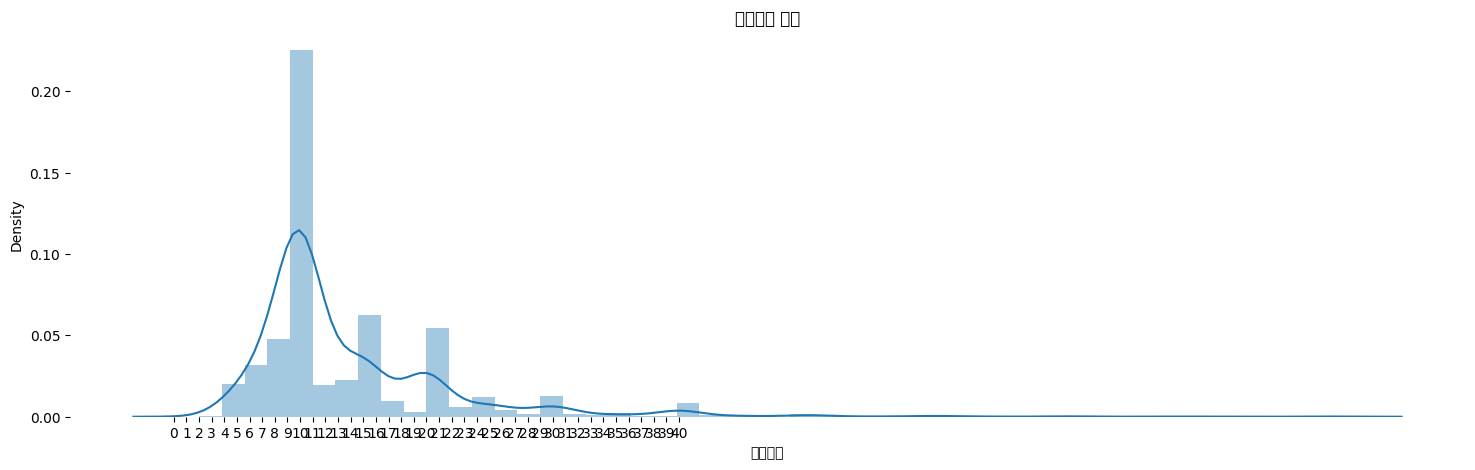

In [ ]:
plt.figure(figsize = (18, 5))
sns.distplot(rental['거치대수'])
plt.title('거치대수 분포')
plt.xticks(range(0, 41))
plt.box(False)
#plt.show()

자치구 별 거치대수 를 bike_rental 변수로 받아 옵니다.

In [ ]:
bike_rental = rental.groupby('자치구')['거치대수'].sum()
bike_rental = bike_rental / have_bikes
bike_rental.sort_values(ascending=False, inplace=True)

- 지역별 대여소의 평균 거치대수 개수, 색이 진할수록 값이 크다.
- 마포,영등포,서초의 경우, 대여소 수도 많았지만, 평균 거치대수도 많다.
  - 즉, 따릉이가 제일 많이 비치되어 있는 지역들이다.
- 용산의 경우, 대여소 수는 적었지만, 평균 거치대 수는 많다.
  - 즉. 한 대여소에 한 번에 많은 따릉이가 비치되어 있다.

In [ ]:
bike_map = folium.Map(location = [rental['위도'].mean(), rental['경도'].mean()], zoom_start = 10.8, tiles = 'cartodbpositron')

folium.Choropleth(geo_data = geo_str,
                  data = bike_rental,
                  key_on = 'feature.properties.SIG_KOR_NM',
                  fill_color = 'Blues').add_to(bike_map)
bike_map

- 좀더 자세히 보기 위해서, bar 차트로 확인해보겠습니다.
  - 지역 별 평균 거치대수는 10 ~ 15대 사이로, 엄청 큰 차이를 보이지는 않습니다.

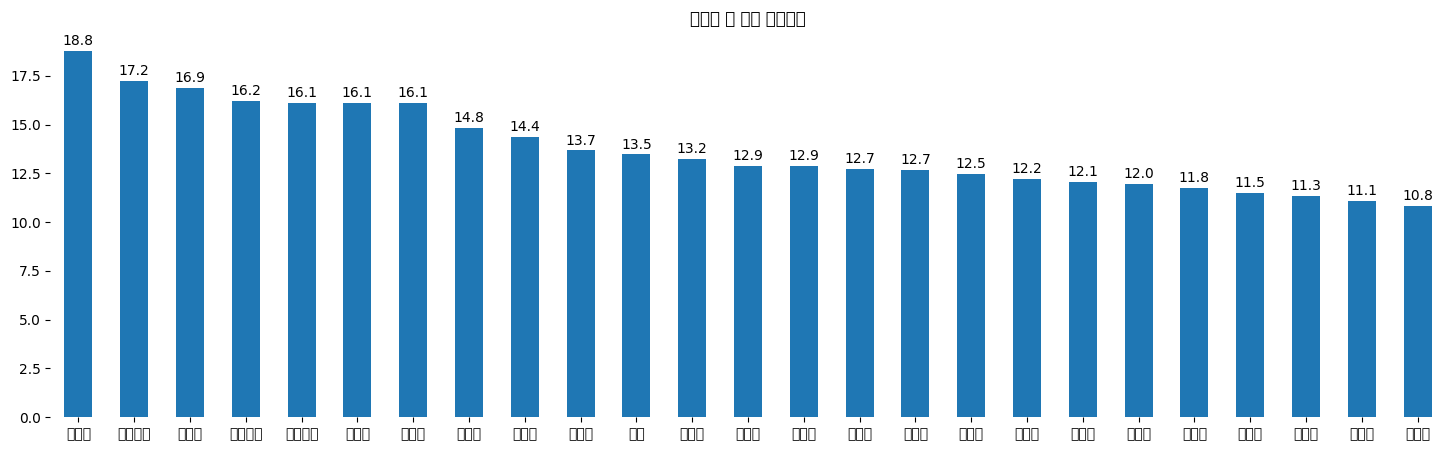

In [ ]:
ax = bike_rental.plot(kind = 'bar', figsize = (18, 5), rot = 0, title = '지역구 별 평균 거치대수')
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate("%.1f"%(height), (left+width/2, height+0.3), ha = 'center')

plt.box(False)
plt.xlabel('')
plt.show()

### 2.3. 가장 가까운 대여소간 평균 거리는 얼마나 다를까?
- 하나의 대여소와 가장 가까운 대여소의 거리들의 평균을 구해보자
- 즉, 대여소가 모여있다면, 평균거리는 작을 것이고, 흩어져 있다면 평균거리는 클 것이다.
- 먼저, 각 지역별로 가장 가까운 대여소간 거리의 분포를 살펴보겠습니다.

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
  # convert decimal degrees to radians
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
  # haversine formula
  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
  c = 2 ** asin(sqrt(a))
  # Radius of earth in kilometers is 6371
  km = 6371 * c
  m = 1000 * km
  return km

In [ ]:
dict_dists = {}

for name, df in rental.groupby('자치구'):
  dists = []
  for i, i_row in df.iterrows():
    min_dist = float('INF')

    for j, j_row in df.iterrows():
      if i == j:
        continue
      distance = haversine(i_row['경도'], i_row['위도'], j_row['경도'], j_row['위도'])
      min_dist = distance if distance < min_dist else min_dist

    dists.append(min_dist)
  dict_dists[name] = dists

AttributeError: Line2D.set() got an unexpected keyword argument 'colot'

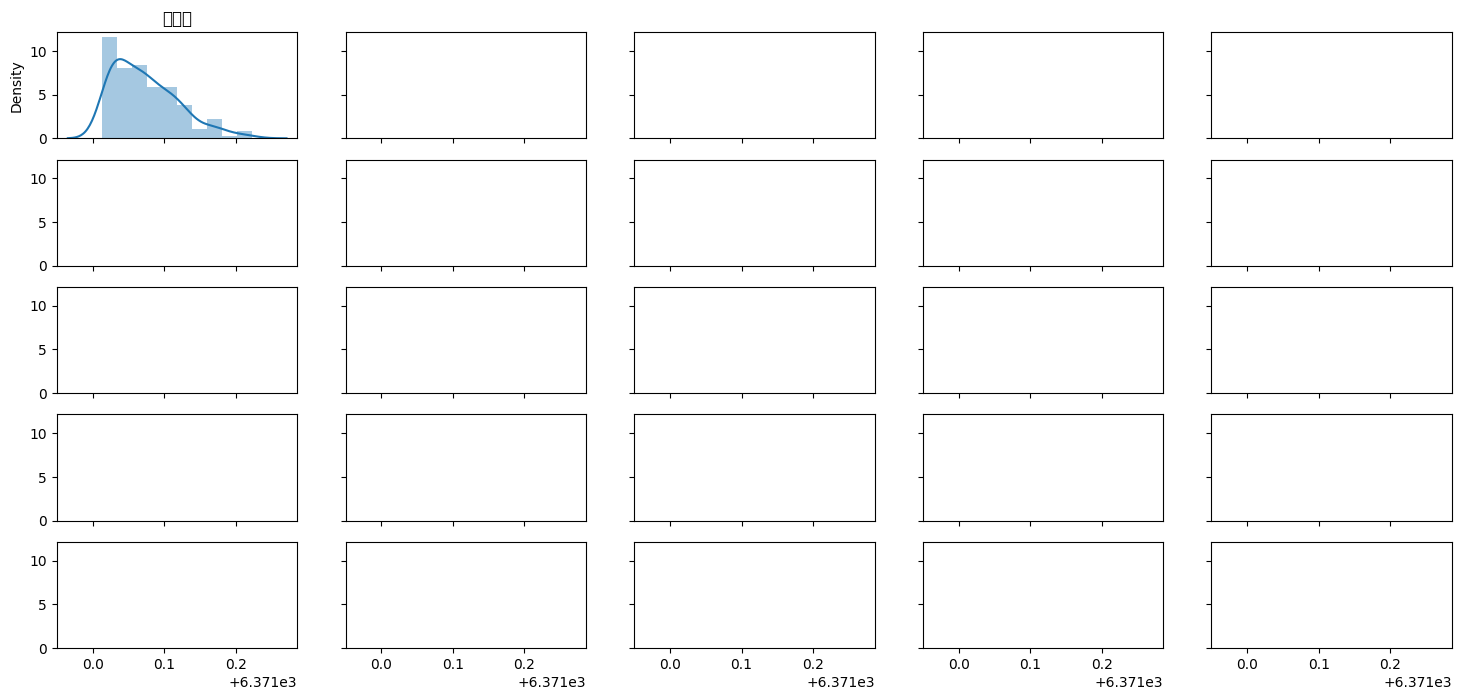

In [ ]:
fig, axes = plt.subplots(5, 5, figsize = (18, 8), sharex = True, sharey = True)

i, j = 0, 0
for name, dists in dict_dists.items():
  sns.distplot(dists, ax = axes[i][j], bins = 10)
  axes[j][i].set_title(name)
  axes[j][i].axvline(np.array(dists).mean(), colot = 'green')
  j += 1
  if j >= 5:
    j += 1
    j = 0

  fig.subtitle('가까운 대여소와의 거리 분포', y = 1.05)
  plt.xlim(0, 1000)
  fit.tight_layout()
  plt.show()